# Custom Scoring Metrics

[![open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ing-bank/probatus/blob/master/docs/tutorials/nb_custom_scoring.ipynb)

In many features of probatus, the user can provide the `scoring` parameter. The parameter can be one of the following:

- String indicating the scoring metric, one of the [classification scorers names in sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html).
- Object of a class Scorer from probatus.utils.Scorer. This object encapsulates the scoring metric name and the scorer used to calculate the model performance.

The following tutorial will present how the `scoring` parameter can be used on the example of a Resemblance Model.

## Setup

Let's prepare some data:

In [ ]:
%%capture
!pip install probatus

In [1]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from probatus.sample_similarity import SHAPImportanceResemblance
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from probatus.utils import Scorer
from sklearn.metrics import make_scorer

# Prepare two samples
feature_names = ['f1', 'f2', 'f3', 'f4']
X1 = pd.DataFrame(make_classification(n_samples=1000, n_features=4, random_state=0)[0], columns=feature_names)
X2 = pd.DataFrame(make_classification(n_samples=1000, n_features=4, shift=0.5, random_state=0)[0], columns=feature_names)

# Prepare model
clf = RandomForestClassifier(n_estimators = 100, max_depth=2, random_state=0)

## Standard metrics

Now, we can set the `scoring` parameter as a string:

In [2]:
rm = SHAPImportanceResemblance(clf, scoring='accuracy')
feature_importance, train_score, test_score = rm.fit_compute(X1, X2, column_names=feature_names, return_scores=True)

print(f'Train Accuracy: {np.round(train_score, 3)},\n' \
      f'Test Accuracy: {np.round(test_score, 3)}.')

Train Accuracy: 0.714,
Test Accuracy: 0.706.


## Custom metric

Let's make a custom function (in this case accuracy as well), that we want to use for scoring and use it within ShapImportanceResemblance

In [11]:
def custom_metric(y_true, y_pred):
    return np.sum(y_true == y_pred)/len(y_true)

scorer = Scorer('custom_metric', custom_scorer=make_scorer(custom_metric))

rm2 = SHAPImportanceResemblance(clf, scoring=scorer)
feature_importance2, train_score2, test_score2 = rm2.fit_compute(X1, X2, column_names=feature_names, return_scores=True)

print(f'Train custom_metric: {np.round(train_score2, 3)},\n' \
      f'Test custom_metric: {np.round(test_score2, 3)}.')

Train Score: 0.714,
Test Score: 0.706.


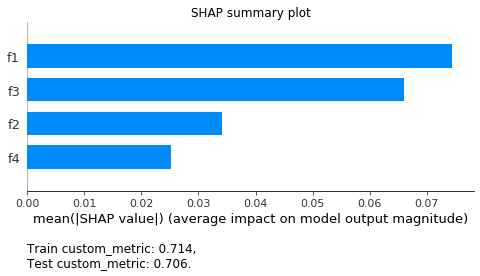

In [13]:
figure = rm2.plot()